In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Informações do Dataframe

- id: Identificador único para cada registro no DataFrame.
- Gender: Gênero do indivíduo (Masculino ou Feminino).
- Age: Idade do indivíduo.
- Height: Altura do indivíduo (em metros).
- Weight: Peso do indivíduo (em kg).
- family_history_with_overweight: Se o indivíduo possui histórico familiar de sobrepeso (1 para sim, 0 para não).
- FAVC: Se o indivíduo consome alimentos ricos em calorias frequentemente (1 para sim, 0 para não).
- FCVC: Consumo de vegetais (em quantidade).
- NCP: Número de refeições principais por dia.
- CAEC: Consumo de comida entre refeições (por exemplo: "Sometimes", "Frequently", etc.).
- SMOKE: Se o indivíduo fuma (1 para sim, 0 para não).
- CH2O: Ingestão de água diária.
- SCC: Se o indivíduo consome refrigerantes (1 para sim, 0 para não).
- FAF: Atividade física semanal.
- TUE: Tempo gasto usando dispositivos eletrônicos (em horas por dia).
- ALC: Consumo de álcool (por exemplo: "Sometimes", "Frequently", etc.).
- MTRANS: Meio de transporte utilizado pelo indivíduo.
- 0be1dad: Classificação do peso do indivíduo.

In [2]:
df = pd.read_csv('./obesity_level.csv')
df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,0rmal_Weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,Sometimes,0,2.151809,0,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,Frequently,0,1.000000,0,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,Sometimes,0,2.000000,0,1.158040,1.198439,0,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,Sometimes,0,2.144838,0,0.000000,0.973834,0,Automobile,Overweight_Level_II


#### Criando uma coluna de nome 'Risk' que representa o risco de óbito com base nos dados das colunas de True e False.

In [3]:
def bigrisk (x):
    if x >= 3:
        return ('High risk')
    elif x >= 2:
        return ('Medium risk')
    else:
        return ('Low risk')
soma = df['SMOKE'] + df['FAVC'] + df['family_history_with_overweight'] + df['SCC']
df['Risk'] = soma.apply(bigrisk)
df.Risk.value_counts()

Risk
Medium risk    15786
Low risk        4513
High risk        459
Name: count, dtype: int64

#### Visualizando a relação entre peso, grau de obesidade e risco de óbito por motivo de sobre-peso entre os participantes do estudo.

Text(0.5, 1.0, 'Relação entre o peso, grau de obesidade e risco de óbito entre os participantes no dataframe')

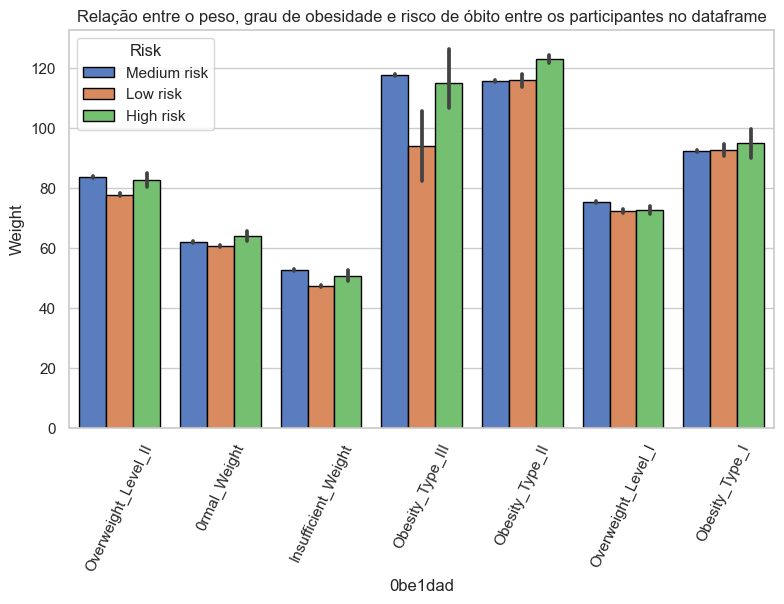

In [4]:
sns.set(style = 'whitegrid')

plt.figure(figsize=(8,6))
sns.barplot(data = df, x = '0be1dad', y = 'Weight', hue = 'Risk', palette = 'muted', edgecolor = 'black')
plt.xticks(rotation = 65)
plt.tight_layout()
plt.title('Relação entre o peso, grau de obesidade e risco de óbito entre os participantes no dataframe')



#### Grau de obesidade por idade em homens e mulheres

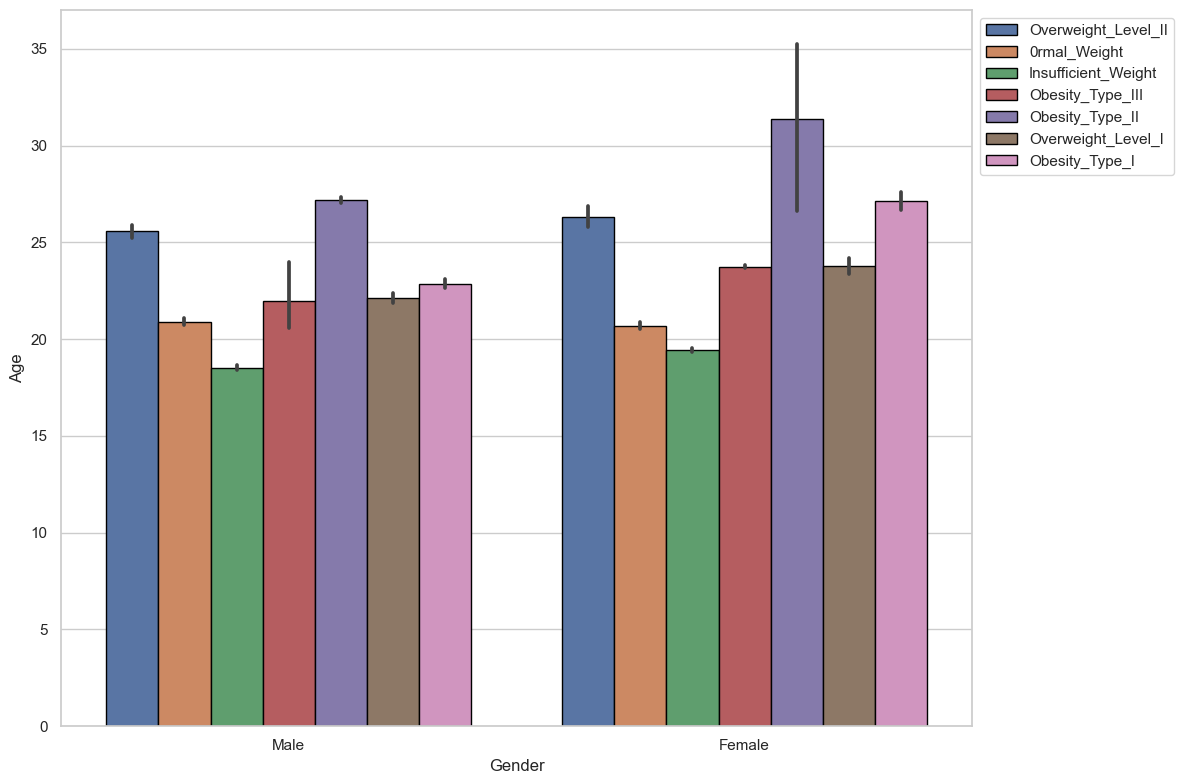

In [16]:
## Convertendo a coluna Age para o tipo inteiro
df['Age'] = df['Age'].astype(int)

## Gerando gráfico de visualização

sns.set(style ='whitegrid')

plt.figure(figsize = (12,8))
sns.barplot(data= df, x = 'Gender', y = 'Age', hue = '0be1dad', palette = 'deep', edgecolor= 'black')
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()

#### Relação entre o Consumo de comida calóricas, entre as refeições, e o peso dos pacientes.

In [6]:
weight_comp= df.groupby(['CAEC','FAVC'])['Weight'].mean().to_frame()
weight_comp

Weight
CAEC       FAVC           
0          0     68.047171
           1     69.223384
Always     0     68.278481
           1     69.766488
Frequently 0     56.941043
           1     59.840490
Sometimes  0     72.277776
           1     94.240834

#### Relação entre o peso do indivíduo e histórico familiar de obesidade

Text(0.5, 55.249999999999986, 'Histórico familiar de sobrepeso na família, 1 para sim, 0 para não')

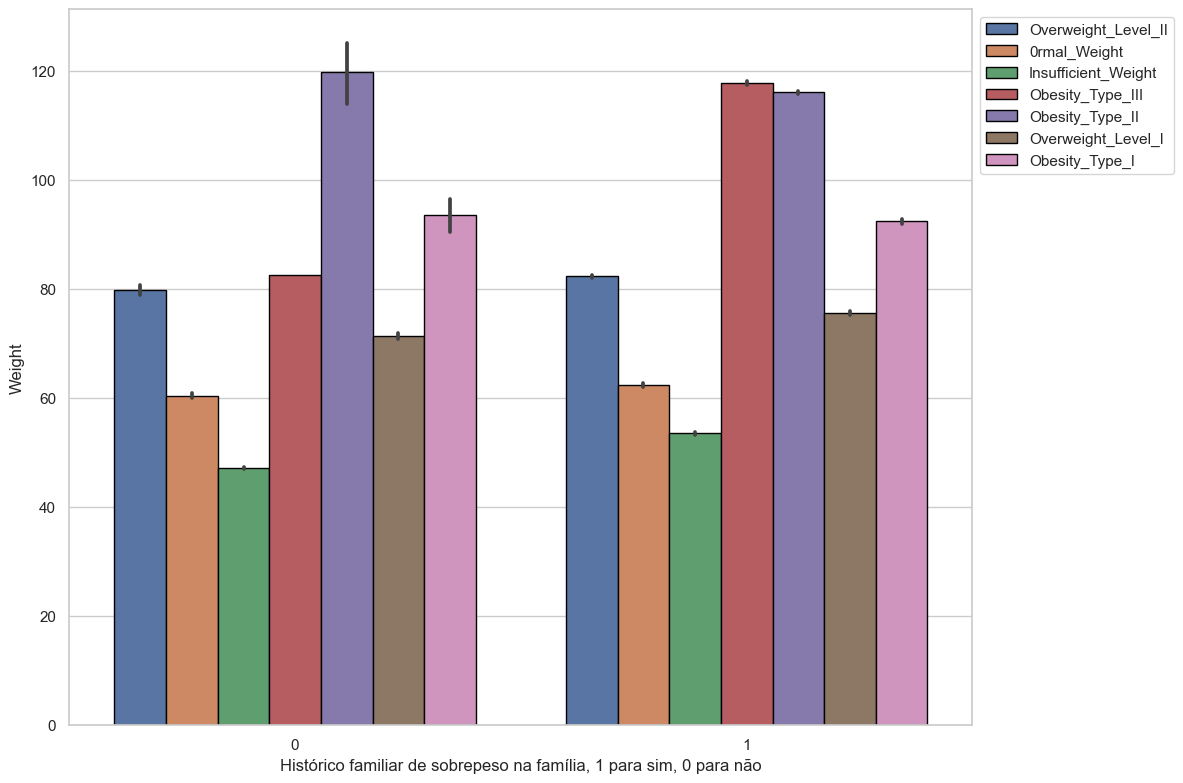

In [13]:
sns.set(style = 'whitegrid')

plt.figure(figsize = (12,8))
sns.barplot(data = df , x = 'family_history_with_overweight', y ='Weight', hue = '0be1dad', palette = 'deep',edgecolor = 'black')
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.xlabel('Histórico familiar de sobrepeso na família, 1 para sim, 0 para não')

#### Relação entre o peso do indivíduo e a prática de atividades físicas

In [15]:
df.groupby('FAF')['Weight'].mean().to_frame()

,Weight
FAF,
0.000000,87.222692
0.000096,109.978391
0.000272,109.404279
0.000454,107.979936
0.001015,108.061951
...,...
2.971832,81.814741
2.977543,97.029249
2.993666,80.000000
